# Keras
Librería para programar redes neuronales de una manera más sencilla que con TensorFlow. Keras se encuentra en una capa de abstracción por encima de TensorFlow.

[Documentación](https://keras.io/guides/)

In [ ]:
# !pip install tensorflow
# !pip install keras

Empezamos importando librerías

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

Cargamos los datos de mnist. No vamos a tratar imagenes con redes convolucionales (perdemos la estructura espacial 2D). Todos los pixeles se convertirán en un vector de 28x28 features independientes, que serán las entradas del modelo.

In [4]:
# Cogemos las imágenes de los dígitos asi como el conjunto de train y test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

Vemos dimensiones del dataset

In [5]:
'''
60.000 imagenes de 28x28 pixeles
'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

60.000 imágenes de 28x28 pixeles. Vamos a representar una de ellas

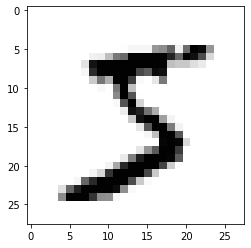

In [7]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap=plt.cm.get_cmap('Greys'));

Cada imagen se compone de 28x28 pixeles, y cada pixel representa una escala de grises que va del 0 al 255. Siendo 0 el blanco y 255 negro.

¿Se te ocurre alguna manera de normalizar los datos?

In [8]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [9]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [10]:
'''
Comprobamos la normalización
'''
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Guardamos datos para validación. Estos datos se usarán durante el entrenamiento. Otra opción es decirle a keras en la etapa de entrenamiento que reserve un X % de los datos para validar.

In [11]:
X_val = X_train[-10000:]
y_val = y_train[-10000:]

X_train = X_train[:-10000]
y_train = y_train[:-10000]

Montamos la arquitectura de la red neuronal. Se va a componer de:
* **Sequential**: API para iniciar la red neuronal. No cuenta como capa.
* **Flatten**: capa de entrada. Necesita un vector unidimensional. Como tenemos imágenes, esta capa aplana las imagenes (2D) en 1D.
* **Dense**: es una hidden layer. Se compondrá de `n` neuronas y de una función de activación que se aplicará a todas las neuronas de la capa.

Recuerda que es un problema de clasificación multiclase (10 clases) y que por tanto la última capa se compondrá de tantas neuronas como clases tengas.

En cuanto a las funciones de activación es recomendable usar relu en las hidden layer, que tarda menos en entrenar, mientras que la ultima (output) suele ser una softmax.

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(units=300, activation='relu'))
model.add(keras.layers.Dense(units=100, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))

In [ ]:
# Otra manera de declarar la red neuronal
capas = [
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(units=300, activation='relu'),
    keras.layers.Dense(units=100, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
]

model = keras.models.Sequential(capas)

Podemos ver las capas, y acceder a sus elementos

In [14]:
print(model.layers[1])
model.layers

Podemos ver los pesos de las capas sin entrenar, porque los inicializa aleatoriamente. Los bias los inicializa a 0.

In [16]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
weights
print(weights.shape)

(784, 300)


Establecemos la configuración de ejecución... el compile.

In [17]:
model.compile(
    optimizer=keras.optimizers.SGD(), # optimizer = 'sgd'
    loss=keras.losses.SparseCategoricalCrossentropy(), # "sparse_categorical_crossentropy"
    metrics=['accuracy']
)

In [ ]:
# Equivalente
model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [18]:
# Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Entrenamos el modelo. Usamos los datos de entrenamiento. El batch_size es la cantidad de muestras que utiliza el SGD, y las epochs son las iteraciones que realiza en el entrenamiento.

In [19]:
history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=15,
    validation_data=(X_val, y_val) # Tb argumento validation_split=0.1
)


Epoch 1/15
782/782 [==============================] - 4s 6ms/step - loss: 0.9041 - accuracy: 0.7691 - val_loss: 0.4091 - val_accuracy: 0.8912
Epoch 2/15
782/782 [==============================] - 4s 5ms/step - loss: 0.3847 - accuracy: 0.8931 - val_loss: 0.3132 - val_accuracy: 0.9130
Epoch 3/15
782/782 [==============================] - 4s 6ms/step - loss: 0.3171 - accuracy: 0.9103 - val_loss: 0.2723 - val_accuracy: 0.9234
Epoch 4/15
782/782 [==============================] - 4s 6ms/step - loss: 0.2803 - accuracy: 0.9208 - val_loss: 0.2493 - val_accuracy: 0.9289
Epoch 5/15
782/782 [==============================] - 5s 6ms/step - loss: 0.2538 - accuracy: 0.9284 - val_loss: 0.2277 - val_accuracy: 0.9358
Epoch 6/15
782/782 [==============================] - 4s 5ms/step - loss: 0.2324 - accuracy: 0.9340 - val_loss: 0.2142 - val_accuracy: 0.9398
Epoch 7/15
782/782 [==============================] - 5s 6ms/step - loss: 0.2154 - accuracy: 0.9387 - val_loss: 0.2043 - val_accuracy: 0.9449
Epoch 

Podemos reentrenar el modelo. No empieza de nuevo, sino que retoma el entrenamiento anterior.

In [20]:
model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=15,
    validation_data=(X_val, y_val) # Tb argumento validation_split=0.1
)

Epoch 1/15
782/782 [==============================] - 4s 5ms/step - loss: 0.1255 - accuracy: 0.9646 - val_loss: 0.1351 - val_accuracy: 0.9631
Epoch 2/15
782/782 [==============================] - 4s 6ms/step - loss: 0.1197 - accuracy: 0.9667 - val_loss: 0.1281 - val_accuracy: 0.9637
Epoch 3/15
782/782 [==============================] - 5s 7ms/step - loss: 0.1143 - accuracy: 0.9681 - val_loss: 0.1237 - val_accuracy: 0.9656
Epoch 4/15
782/782 [==============================] - 5s 6ms/step - loss: 0.1090 - accuracy: 0.9696 - val_loss: 0.1215 - val_accuracy: 0.9654
Epoch 5/15
782/782 [==============================] - 4s 5ms/step - loss: 0.1042 - accuracy: 0.9710 - val_loss: 0.1168 - val_accuracy: 0.9660
Epoch 6/15
782/782 [==============================] - 4s 6ms/step - loss: 0.0998 - accuracy: 0.9727 - val_loss: 0.1154 - val_accuracy: 0.9676
Epoch 7/15
782/782 [==============================] - 4s 6ms/step - loss: 0.0958 - accuracy: 0.9737 - val_loss: 0.1124 - val_accuracy: 0.9662
Epoch 

Veamos el histórico del entrenamiento, para poder representarlo posteriormente.

In [23]:
print(history.params)
print(history.epoch)
history.history

{'verbose': 1, 'epochs': 15, 'steps': 782}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


{'loss': [0.9041219353675842,
  0.3846908509731293,
  0.31708410382270813,
  0.28025078773498535,
  0.2538030743598938,
  0.23244954645633698,
  0.21541529893875122,
  0.20005124807357788,
  0.18715029954910278,
  0.1751769334077835,
  0.1645427793264389,
  0.15522031486034393,
  0.14693637192249298,
  0.13902147114276886,
  0.13176655769348145],
 'accuracy': [0.7690799832344055,
  0.893060028553009,
  0.9102799892425537,
  0.9208400249481201,
  0.9284200072288513,
  0.9340400099754333,
  0.9386799931526184,
  0.9436799883842468,
  0.9469000101089478,
  0.9502400159835815,
  0.953540027141571,
  0.9556400179862976,
  0.958299994468689,
  0.9607399702072144,
  0.9633600115776062],
 'val_loss': [0.4090692102909088,
  0.3131576478481293,
  0.27233070135116577,
  0.24932922422885895,
  0.22767695784568787,
  0.21418434381484985,
  0.20429934561252594,
  0.1858399659395218,
  0.17748475074768066,
  0.16653725504875183,
  0.15909309685230255,
  0.153065025806427,
  0.1461041420698166,
  0.13

In [26]:
model.history.history

{'loss': [0.12553876638412476,
  0.11968433856964111,
  0.11425674706697464,
  0.10900083929300308,
  0.10421714931726456,
  0.09978354722261429,
  0.0958055853843689,
  0.09176751971244812,
  0.08797816187143326,
  0.0847892090678215,
  0.08157777041196823,
  0.07830803096294403,
  0.07541851699352264,
  0.07263858616352081,
  0.07001947611570358],
 'accuracy': [0.9646000266075134,
  0.9667199850082397,
  0.9681000113487244,
  0.9695799946784973,
  0.9709799885749817,
  0.9727200269699097,
  0.9737200140953064,
  0.9750400185585022,
  0.9761800169944763,
  0.9769799709320068,
  0.9779599905014038,
  0.9785400032997131,
  0.9798200130462646,
  0.9802799820899963,
  0.9816200137138367],
 'val_loss': [0.13511070609092712,
  0.12809577584266663,
  0.12366896122694016,
  0.12149587273597717,
  0.11678148061037064,
  0.11537183821201324,
  0.11238675564527512,
  0.11205312609672546,
  0.10696402937173843,
  0.10452702641487122,
  0.10590362548828125,
  0.10025197267532349,
  0.0986389666795

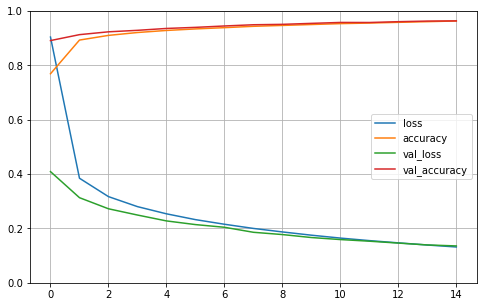

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Si el modelo no ha ido bien, prueba a cambiar el learning rate, cambia de optimizador y después prueba a cambiar capas, neuronas y funciones de activación.

Ya tenemos el modelo entrenado. Probémoslo con test

In [28]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 1s 3ms/step - loss: 0.0973 - accuracy: 0.9700
test loss, test acc: [0.0972798690199852, 0.9700000286102295]


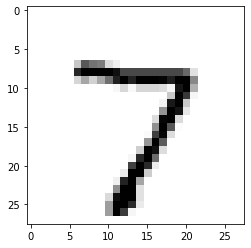

In [29]:
# Cogemos el primero
plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

In [32]:
X_test[:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [33]:
predictions = model.predict(X_test[:1]).round(3)
print("shape", predictions.shape)
predictions

shape (1, 10)


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.999, 0.   ,
        0.   ]], dtype=float32)

In [34]:
predictions.max()

0.999

In [35]:
predictions.argmax()

7

### Problema de regresión
Veamos un ejemplo de cómo aplicar una red neuronal de TensorFlow a un problema de regresión.

In [39]:
# Cargamos datos
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['target'] = housing['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Divimos en train, test y validation

In [40]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [41]:
X_train.shape

(11610, 8)

Montamos el modelo. Simplemente se compondrá de una hidden layer, a la que le configuramos una capa previa de entrada de 8 neuronas (las features).

Se trata de un modelo de regresión, por lo que la capa de salida es una única neurona.

In [46]:
model = keras.models.Sequential([
    keras.layers.Dense(100, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error',
              optimizer='sgd')
history = model.fit(X_train,
         y_train,
         epochs=20,
         validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8018 - val_loss: 0.5397
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5844 - val_loss: 0.4482
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4530 - val_loss: 0.4285
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4247 - val_loss: 0.4029
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4100 - val_loss: 0.3898
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3957 - val_loss: 0.3843
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3864 - val_loss: 0.3731
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3776 - val_loss: 0.3648
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3700 - val_loss: 0.3573
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3630 - val_loss: 0.3531

In [47]:
mse_test = model.evaluate(X_test, y_test)
mse_test

162/162 [==============================] - 0s 2ms/step - loss: 0.3334


0.33342719078063965

In [44]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

array([[0.8584834],
       [1.4391313],
       [2.7246506]], dtype=float32)

In [48]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

array([[0.7530247],
       [1.3425229],
       [2.7992435]], dtype=float32)

In [45]:
y_test[:3]

array([0.59 , 1.843, 2.713])

### Guardar modelo
Para guardar el modelo, en el formato de Keras (HDF5). 

In [49]:
model.save('my_model.h5')

In [50]:
# Lo volvemos a cargar
model = keras.models.load_model('my_model.h5')

### Callbacks
Sirven para que el modelo se vaya guardando tras cada epoch, asi no perdemos el progreso en caso de que decidamos interrumpir el entrenamiento. El callback recibe como argumento el nombre del objeto donde queremos que se guarde el modelo entrenado.

In [51]:
checkpoint = keras.callbacks.ModelCheckpoint("callback_model.h5")

history = model.fit(X_train,
                     y_train,
                     epochs=20,
                     validation_data=(X_valid, y_valid),
                     callbacks=[checkpoint]
                   )

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3186 - val_loss: 0.3186
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3180 - val_loss: 0.3099
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3139 - val_loss: 0.3103
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3119 - val_loss: 0.3029
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3103 - val_loss: 0.3146
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3079 - val_loss: 0.3303
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3085 - val_loss: 0.3106
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3064 - val_loss: 0.3028
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3053 - val_loss: 0.2980
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3034 - val_loss: 0.3016

### Early Stopping
Interrumpe el entrenamiento cuando no ve progreso en el set de validación. Para ello tiene en cuenta un numero de epochs llamado `patience`. Se puede combinar con el callback

In [52]:
early_stopping = keras.callbacks.EarlyStopping(patience=5,
                                              restore_best_weights=True)

history = model.fit(X_train,
                     y_train,
                     epochs=20,
                     validation_data=(X_valid, y_valid),
                     callbacks=[checkpoint, early_stopping]
                   )

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2918 - val_loss: 0.2886
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2894 - val_loss: 0.2952
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.2898 - val_loss: 0.2869
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.2876 - val_loss: 0.2987
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.2879 - val_loss: 0.2905
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2868 - val_loss: 0.2973
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2841 - val_loss: 0.2813
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.2835 - val_loss: 0.2826
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.2834 - val_loss: 0.2818
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.2822 - val_loss: 0.2780

### Dashboard
Keras tiene implementado un dashboard para monitorizar las ejecuciones del modelo

In [53]:
import os

# Crea este directorio
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

# Guarda una carpeta nueva con la fecha de la ejecucion
run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'

In [54]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/50
  1/363 [..............................] - ETA: 0s - loss: 0.1286WARNING:tensorflow:From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
363/363 [==============================] - 1s 3ms/step - loss: 0.2801 - val_loss: 0.2877
Epoch 2/50
363/363 [==============================] - 1s 4ms/step - loss: 0.2827 - val_loss: 0.2797
Epoch 3/50
363/363 [==============================] - 1s 3ms/step - loss: 0.2819 - val_loss: 0.2752
Epoch 4/50
363/363 [==============================] - 1s 4ms/step - loss: 0.2793 - val_loss: 0.2805
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.2812 - val_loss: 0.2823
Epoch 6/50
363/363 [==============================] - 1s 3ms/step - loss: 0.2798 - val_loss: 0.2744
Epoch 7/50
363/363 [==============================] -

In [ ]:
'''
Para lanzarlo desde el jupyter notebook
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

Para lanzarlo desde el terminal, hay que estar en la carpeta de los logs
tensorboard --logdir=./my_logs --port=6006

'''